In [6]:
import pandas as pd

# Cargar los datos de Amazon UK en un DataFrame
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')  

Parte 1: Comprensión de las categorías de productos

Tablas de frecuencias :

Generar una tabla de frecuencias para el producto category.
¿Cuáles son las 5 categorías de productos más cotizadas?

In [8]:
# Generar tabla de frecuencias por categoría de producto
freq_table = df['category'].value_counts().reset_index()
freq_table.columns = ['product_category', 'frequency']

# Mostrar las 5 categorías más cotizadas
top_5_categories = freq_table.head(5)
print(top_5_categories)

                         product_category  frequency
0                       Sports & Outdoors     836265
1                                  Beauty      19312
2  Handmade Clothing, Shoes & Accessories      19229
3                             Bath & Body      19092
4                          Birthday Gifts      18978


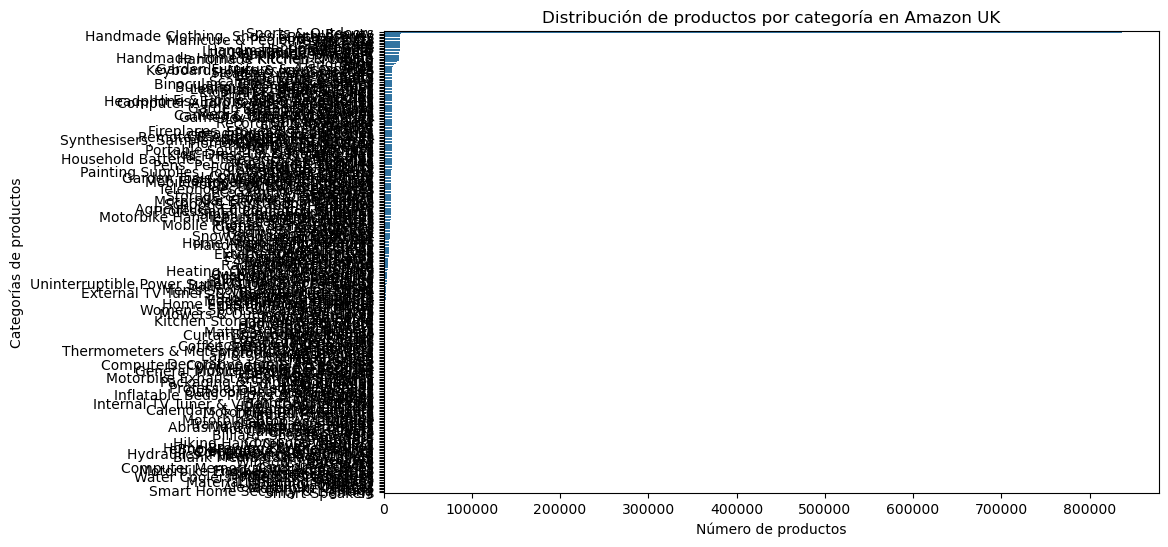

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para la distribución de productos en categorías
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='product_category', data=freq_table)
plt.title('Distribución de productos por categoría en Amazon UK')
plt.xlabel('Número de productos')
plt.ylabel('Categorías de productos')
plt.show()


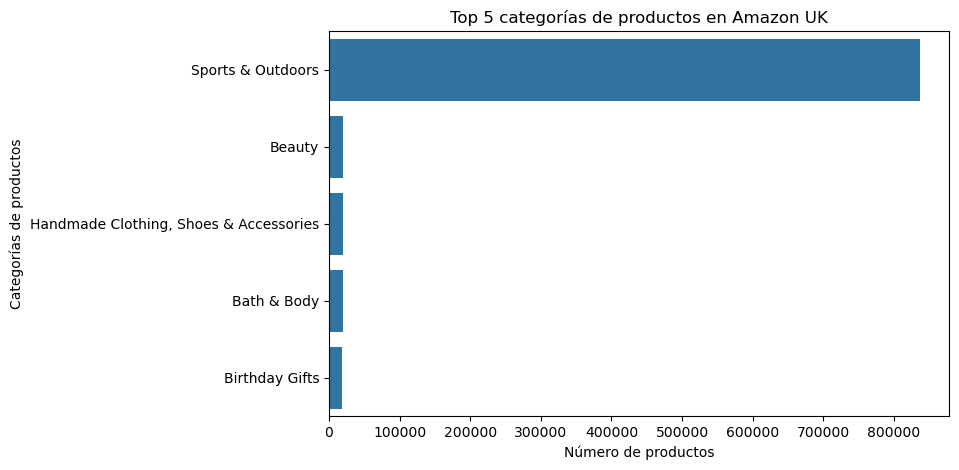

In [11]:
# Gráfico de barras para las 5 categorías principales
plt.figure(figsize=(8, 5))
sns.barplot(x='frequency', y='product_category', data=top_5_categories)
plt.title('Top 5 categorías de productos en Amazon UK')
plt.xlabel('Número de productos')
plt.ylabel('Categorías de productos')
plt.show()


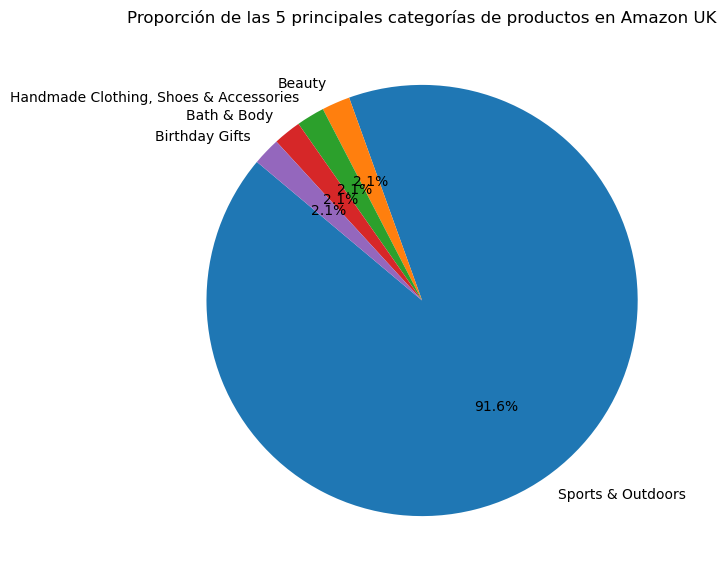

In [12]:
# Gráfico circular para las 5 principales categorías
plt.figure(figsize=(7, 7))
plt.pie(top_5_categories['frequency'], labels=top_5_categories['product_category'], autopct='%1.1f%%', startangle=140)
plt.title('Proporción de las 5 principales categorías de productos en Amazon UK')
plt.show()


Parte 2: Profundizando en el precio de los productos

In [13]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convert prices to numeric, invalid values will be NaN

# Remove rows with missing or invalid prices
df = df.dropna(subset=['price'])

In [14]:
# Calculate measures of centrality
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  # The mode can return multiple values, so we select the first one

print(f"Mean price: £{mean_price:.2f}")
print(f"Median price: £{median_price:.2f}")
print(f"Mode (most common) price: £{mode_price:.2f}")


Mean price: £89.24
Median price: £19.09
Mode (most common) price: £9.99


In [15]:
# Calculate measures of dispersion
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

print(f"Variance: {variance_price:.2f}")
print(f"Standard Deviation: £{std_dev_price:.2f}")
print(f"Range: £{range_price:.2f}")
print(f"IQR (Interquartile Range): £{iqr:.2f}")


Variance: 119445.49
Standard Deviation: £345.61
Range: £100000.00
IQR (Interquartile Range): £36.00


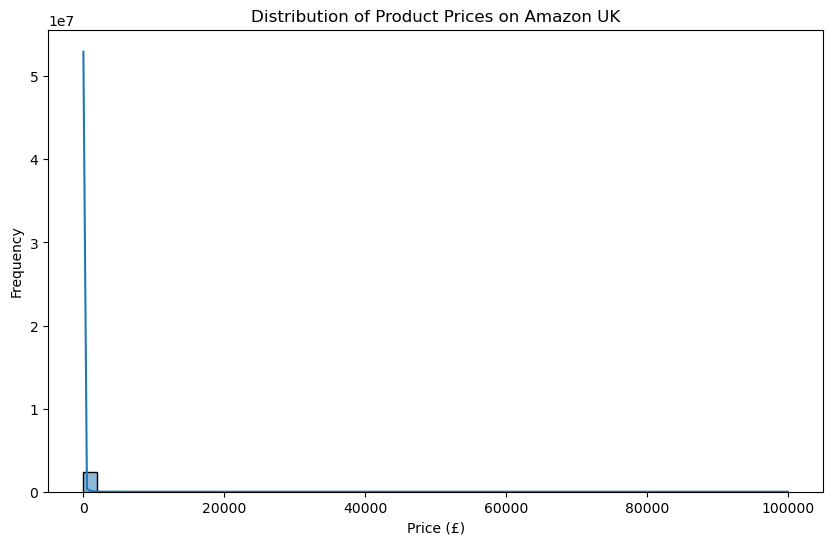

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Histogram to visualize the distribution of product prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)  # Kernel density estimation (KDE) helps visualize the density
plt.title('Distribution of Product Prices on Amazon UK')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()


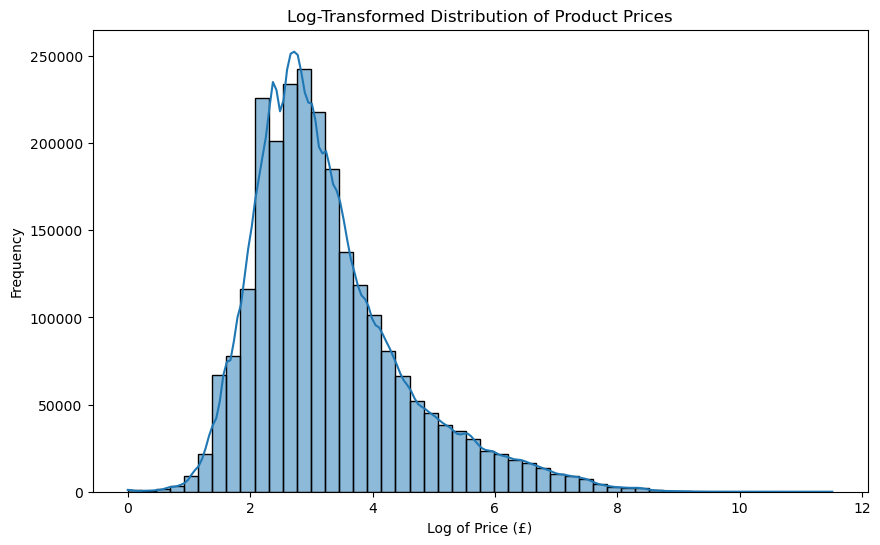

In [21]:


# Log transformation of price data
df['log_price'] = df['price'].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)

# Plot histogram for log-transformed prices
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], bins=50, kde=True)
plt.title('Log-Transformed Distribution of Product Prices')
plt.xlabel('Log of Price (£)')
plt.ylabel('Frequency')
plt.show()



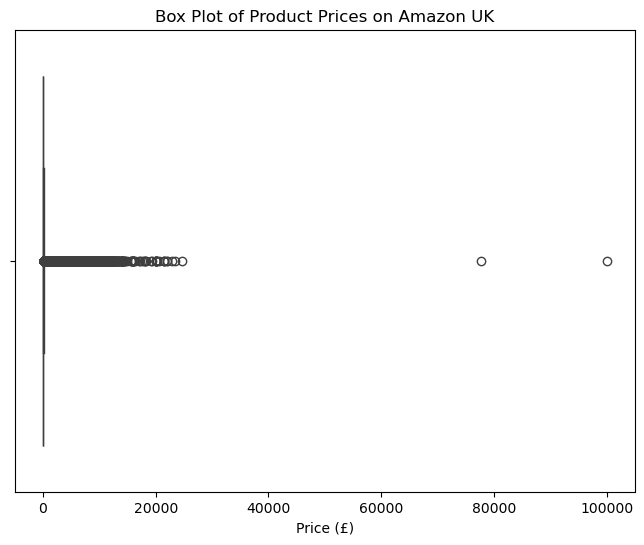

In [20]:
# Box plot to showcase spread and outliers in product pricing
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df)
plt.title('Box Plot of Product Prices on Amazon UK')
plt.xlabel('Price (£)')
plt.show()


Part 3: Unpacking Product Ratings

In [24]:
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')  # Convertir calificaciones a numérico

# Eliminar calificaciones inválidas o NaN
df = df.dropna(subset=['stars'])

In [25]:
# Calcular la media, mediana y moda
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]  # La moda puede devolver múltiples valores, seleccionamos el primero

print(f"Mean (Promedio): {mean_rating:.2f}")
print(f"Median (Mediana): {median_rating:.2f}")
print(f"Mode (Moda): {mode_rating:.2f}")


Mean (Promedio): 2.15
Median (Mediana): 0.00
Mode (Moda): 0.00


In [26]:
# Calcular la varianza, desviación estándar y el rango intercuartil (IQR)
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
q1 = df['stars'].quantile(0.25)
q3 = df['stars'].quantile(0.75)
iqr = q3 - q1

print(f"Varianza: {variance_rating:.2f}")
print(f"Desviación Estándar: {std_dev_rating:.2f}")
print(f"IQR (Rango Intercuartil): {iqr:.2f}")


Varianza: 4.82
Desviación Estándar: 2.19
IQR (Rango Intercuartil): 4.40


In [27]:
# Calcular la asimetría y la curtosis
from scipy.stats import skew, kurtosis

skewness = skew(df['stars'])
kurt = kurtosis(df['stars'])

print(f"Asimetría: {skewness:.2f}")
print(f"Curtosis: {kurt:.2f}")


Asimetría: 0.08
Curtosis: -1.93


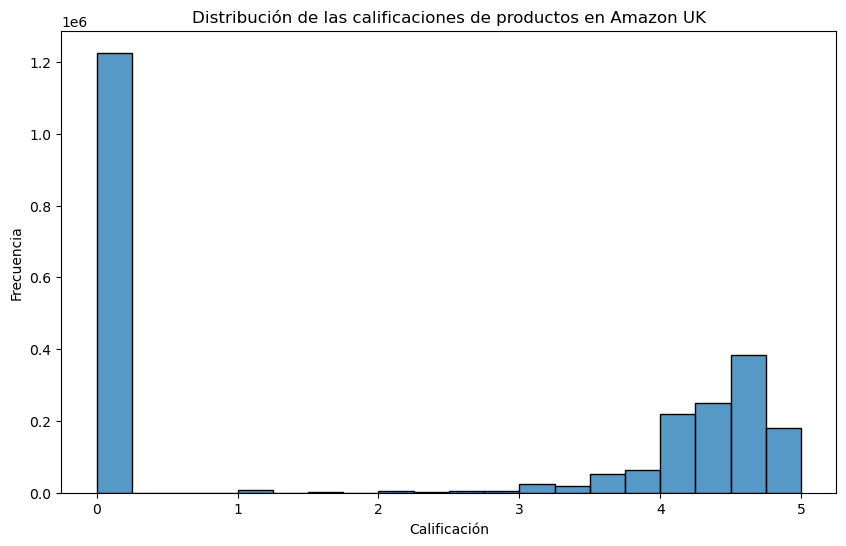

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para la distribución de calificaciones
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=20, kde=False)
plt.title('Distribución de las calificaciones de productos en Amazon UK')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()
